In [1]:
import os
os.chdir(os.path.dirname('../hypeminer/'))
print(os.getcwd())

C:\Users\Agando\Workspace\hypeminer\hypeminer


In [2]:
from hypeminer.stream_tweets import TweetStreamer

streamer = TweetStreamer('BTCBUSD')

### TODO: fix streamer

In [3]:
# streamer.stream_tweets(n_tweets=10)

### A better sentiment index

In [4]:
def get_tweets():
    all_tweets = []
    for file_id in streamer.list_file_ids():
        tweets, timestamp, outfile = streamer.tweets_from_dump(file_id)
        all_tweets += tweets[0]['results']
    return all_tweets
    
tweets = get_tweets()
print(len(tweets))

25200


In [5]:
tweets[1]

{'created_at': 'Fri May 14 11:59:59 +0000 2021',
 'id': 1393174249385365505,
 'id_str': '1393174249385365505',
 'text': "RT @DocumentingBTC: Norway's 🇳🇴 Minister of Climate and the Environment, says he hodls #bitcoin\n\nThe minister carrying out the environmenta…",
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 876823645,
  'id_str': '876823645',
  'name': 'Andrewstotle',
  'screen_name': 'Andrewstotle',
  'location': None,
  'url': 'https://youtu.be/NNuQ_oEsZHY',
  'description': 'Absolute Scarcity - you either get into #bitcoin out of curiosity or necessity... the only difference is time',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 676,
  'friends_count': 266,
  'listed_count': 11,
  'f

In [6]:
import pandas as pd

data = {}
for t in tweets:
    text = t['retweeted_status']['text'] if 'retweeted_status' in t else t['text']
    if t['id'] not in data:
        data[t['id']] = {'dt': t['created_at'], 'id': t['id'], 'text': text, 
                         'retweet': t['retweet_count'], 'fav': t['favorite_count'], 'quote': t['quote_count']}
df = pd.DataFrame(data.values())

df['dt'] = pd.to_datetime(df['dt'])
df = df.set_index('dt')
df = df.sort_values(by='dt')

In [7]:
pd.set_option('display.max_colwidth', True)

In [8]:
df_btc = df[df['text'].map(lambda x: any([y in x for y in ['Bitcoin', 'BTC']]))]
df_btc

,id,text,retweet,fav,quote
dt,,,,,
2021-05-14 11:59:38+00:00,1393174160478769153,"""I frankly don't think anyone was buying cars with #Bitcoin to begin with.”\n\nFun chat with @APompliano on Elon Musk… https://t.co/jLxsUmG0uV",0,0,0
2021-05-14 11:59:39+00:00,1393174163704016896,"$BTC is down, but nobody cares because $DOGE is the future.",0,0,0
2021-05-14 11:59:40+00:00,1393174170717065218,Can confirm Bitcoin uses a lot of energy. I’ve been reading Bitcoin tweets all day and I’m exhausted,0,0,0
2021-05-14 11:59:40+00:00,1393174169630633991,@johnnyg1970 @cryptomanran @elonmusk @Tesla @dogecoin @elonmusk and his own views on #BTC My response was towards… https://t.co/qPMQrJNLvS,1,1,0
2021-05-14 11:59:42+00:00,1393174178816200704,"BinanceData shows that #BTC fell in the short term, falling below the $49500 mark, and is now trading at $49499.96,… https://t.co/LRlx9iuayJ",0,0,0
...,...,...,...,...,...
2021-05-24 22:59:58+00:00,1396964217308205062,#SAFEMOON Next Bitcoin 🌕🚀,0,0,0
2021-05-24 22:59:58+00:00,1396964216305856512,The ESG focused Bitcoin mining council initial meeting https://t.co/w0X0pyt5nU,0,0,0
2021-05-24 22:59:58+00:00,1396964216037384192,Telling me that all of #Bitcoin’s problems are going to be solved in the future is like telling me that Atari is ev… https://t.co/pQqcphGgsN,0,0,0


In [9]:
print('\n\n'.join(list(df_btc.iloc[:40]['text'])))

"I frankly don't think anyone was buying cars with #Bitcoin to begin with.”

Fun chat with @APompliano on Elon Musk… https://t.co/jLxsUmG0uV

$BTC is down, but nobody cares because $DOGE is the future.

Can confirm Bitcoin uses a lot of energy. I’ve been reading Bitcoin tweets all day and I’m exhausted

@johnnyg1970 @cryptomanran @elonmusk @Tesla @dogecoin @elonmusk  and his own views on #BTC  My response was towards… https://t.co/qPMQrJNLvS

BinanceData shows that #BTC fell in the short term, falling below the $49500 mark, and is now trading at $49499.96,… https://t.co/LRlx9iuayJ

😲 #blockchain characteristics, a comparison between #MHC, #XRP, #BSC, #ETH and #BTC. 
👁‍🗨Decide for yourself! Just… https://t.co/NubFKa4TRo

Elon Musk's net worth has taken a $20 BILLION nosedive after his SNL appearance thanks to Bitcoin and Dogecoin slide
https://t.co/u8W1iWFZuM

Can confirm Bitcoin uses a lot of energy. I’ve been reading Bitcoin tweets all day and I’m exhausted

I want to participate in D

In [10]:
from transformers import pipeline

classifier = pipeline('zero-shot-classification', model='facebook/bart-large-mnli', device=0) # to utilise GPU: 

In [14]:
from tqdm import trange

sentiments = ['positive', 'negative', 'enthusiastic', 'confused', 'angry', 'sad',
              'greedy', 'fearful', 'shocked', 'hopeful', 'indifferent', 'sarcastic']

batch_size = 200

def classify(texts):
    hypothesis_template = "This user is feeling {} about Bitcoin."
    result = classifier([f"The user said: \"{text}\"" for text in texts], sentiments, 
                      multi_label=True, hypothesis_template=hypothesis_template, num_workers=0)
    return result

sent_data = {sent: [] for sent in sentiments}

for i in trange(1 + len(df) // batch_size, desc='Scoring sentiments...', ncols=100):
    batch = list(df['text'].iloc[i * batch_size : (i+1) * batch_size])
    for t in classify(batch):
        for sent, score in zip(t['labels'], t['scores']):
            sent_data[sent].append(score)
#     if len(sent_data[sentiments[0]]) > 100:
#         break

Scoring sentiments...:   3%|█▏                                    | 4/127 [02:20<1:12:05, 35.16s/it]C:\Users\Agando\AppData\Roaming\Python\Python37\site-packages\transformers\pipelines\base.py:910: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  UserWarning,
Scoring sentiments...: 100%|████████████████████████████████████| 127/127 [1:11:04<00:00, 33.58s/it]


In [15]:
for sent in sent_data['positive']:
    print(sent)
    break

0.5752085447311401


In [19]:
df_sub = df.copy()

for sent in sentiments:
    df_sub[f"sa/{sent}"] = sent_data[sent]
    
df_sub

,id,text,retweet,fav,quote,sa/positive,sa/negative,sa/enthusiastic,sa/confused,sa/angry,sa/sad,sa/greedy,sa/fearful,sa/shocked,sa/hopeful,sa/indifferent,sa/sarcastic
dt,,,,,,,,,,,,,,,,,
2021-05-14 11:59:38+00:00,1393174158943551488,"#Coinbase will be listing #dogecoin in the next six to eight weeks, the company's CEO has revealed. #doge https://t.co/V5ihU3XDw2",0,0,0,0.575209,0.001931,0.524131,0.102309,0.006660,0.000760,0.079547,0.001699,0.051855,0.803980,0.001910,0.823520
2021-05-14 11:59:38+00:00,1393174159497351175,Team Diamondhands #bitcoin https://t.co/5EDneuGw0J,0,0,0,0.968690,0.009377,0.975997,0.458725,0.684186,0.057524,0.616361,0.009356,0.541869,0.939422,0.001711,0.991962
2021-05-14 11:59:38+00:00,1393174160478769153,"""I frankly don't think anyone was buying cars with #Bitcoin to begin with.”\n\nFun chat with @APompliano on Elon Musk… https://t.co/jLxsUmG0uV",0,0,0,0.003408,0.998679,0.003779,0.998280,0.959144,0.785755,0.030984,0.955946,0.997098,0.001037,0.993426,0.997933
2021-05-14 11:59:39+00:00,1393174163704016896,"$BTC is down, but nobody cares because $DOGE is the future.",0,0,0,0.018714,0.980912,0.012382,0.977267,0.808293,0.474026,0.104182,0.134251,0.676906,0.044869,0.990586,0.995832
2021-05-14 11:59:39+00:00,1393174163444146179,"Let's talk about Elon's ""hustle"" with Tesla's bitcoin holdings and why it's horrible for markets and the public at large. (1/) 🧵",0,0,0,0.000174,0.998921,0.000776,0.959235,0.996576,0.937956,0.654683,0.992745,0.970175,0.000079,0.002960,0.971979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-24 22:59:58+00:00,1396964215680913418,.@CoinKoda just had a good bounce and looking ready for a potential ATH. The CEO (James) has mentioned big plans f… https://t.co/WahpM7tkXU,0,0,0,0.991829,0.005728,0.973221,0.355089,0.047939,0.001675,0.323555,0.005003,0.073142,0.991079,0.005695,0.861263
2021-05-24 22:59:59+00:00,1396964222500675586,💧 SafeSpace Airdrop💧\n\n📍 Listed on: PancakeSwap &amp; 1inch\n\n🏆 Task: ➕ Up to 600M SAFESPACE (~$3)\n\n👨‍👩‍👧 Refer… https://t.co/9b7bLCp2gp,0,0,0,0.287996,0.040472,0.403987,0.041561,0.023711,0.003296,0.138464,0.013845,0.012098,0.302847,0.004586,0.723617
2021-05-24 22:59:59+00:00,1396964220600717318,@BTC_Archive txtZ send and receive BtcZ using SMS text. #BitcoinZ #BtcZ #bitcoinzhalving https://t.co/FL9xucnOSR,0,0,0,0.432632,0.846611,0.878321,0.547018,0.840577,0.726820,0.243197,0.900444,0.569019,0.004210,0.004915,0.921623


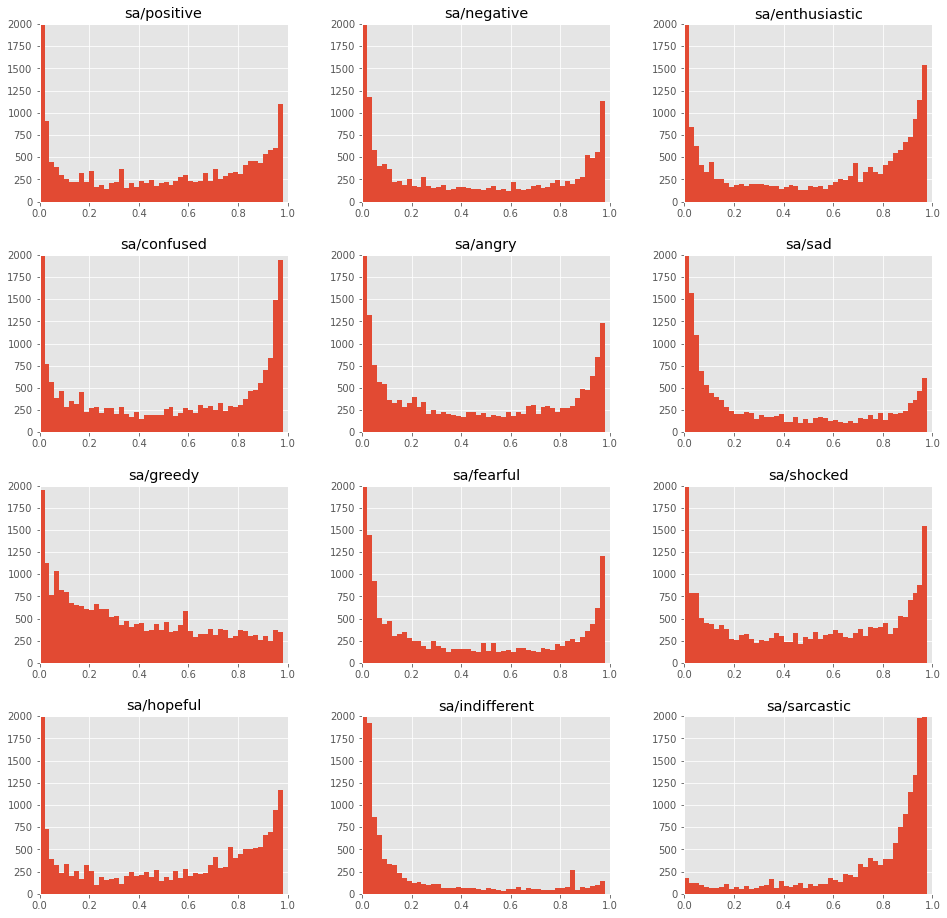

In [23]:
import math
import matplotlib.pyplot as plt
import numpy as np

def signal_hist(df_input, signals, norm=False, per_line=3, limits=[0.0, 1.0, 600], nbins=50):
    df_x = df_input[signals].copy()
    if norm:
        for s in signals:
            df_x[s] = (df_x[s] - df_x[s].mean()) / df_x[s].std()
    lines = math.ceil(len(signals) / per_line)
    fig, axes = plt.subplots(lines, per_line, figsize=(16, 4*lines))
    if type(axes) is not np.ndarray:
        axes = [axes]
    for i, triaxis in enumerate(axes):
        if type(triaxis) is not np.ndarray:
            triaxis = [triaxis]
        for j, axis in enumerate(triaxis):
            axis.set_xlim(limits[:2])
            axis.set_ylim([0, limits[2]])
            try:
                df_x.hist(column=signals[i * per_line + j], bins=np.arange(limits[0], limits[1], 
                                                                        (limits[1]-limits[0])/nbins), ax=axis)
            except IndexError:
                continue
                
signal_hist(df_sub, [f"sa/{sent}" for sent in sentiments], limits=[0.0, 1.0, 2000], nbins=50)

In [27]:
df_sub.sort_values(by='sa/hopeful', ascending=False)[['text', 'sa/hopeful']][:20]

,text,sa/hopeful
dt,,
2021-05-23 19:59:55+00:00,Chinese #Bitcoin mining going green! Bullish! https://t.co/g4u913q7Xo,0.999840
2021-05-22 18:59:46+00:00,Btc quietly looking bullish af lol,0.999820
2021-05-21 17:59:56+00:00,HODL!!! 💎🙌 i am still bullish🚀#BTC #ETH #LINK #ADA #DOT #UNI #BAKE https://t.co/r8f7w48Bgh,0.999808
2021-05-18 17:59:47+00:00,#ATOM 🚀🚀🚀🚀🚀#btc #eth #xrp #CELR Bullish!!,0.999800
2021-05-24 21:59:50+00:00,Confidence is coming back to #Bitcoin!!!!,0.999798
2021-05-19 17:59:56+00:00,@usfjx Oh yeah!!! #Bitcoin \n🚀🚀🚀,0.999796
2021-05-21 06:59:48+00:00,*Bitcoin Rebounds on Optimism Crypto Bloodbath Nears End - https://t.co/DgO1xp1yCd\n\n#BTC #Bitcoin https://t.co/FOlPFI6QLZ,0.999788
2021-05-19 05:59:53+00:00,@maxthesn0wflake yeah after that i invested more into bitcoin and some eco friendly shit just cause im hoping it’s… https://t.co/z8iaALyPoO,0.999777
2021-05-24 21:59:53+00:00,Bullish for:\n#Bitcoin #altcoin #shitcoins #Fiat,0.999774


In [10]:
# df_sub.to_csv('../notebooks/complex-sentiment-analysis.csv', index=False)

import pandas as pd
df_sub = pd.read_csv('../notebooks/complex-sentiment-analysis.csv')
df_sub = df_sub.

,id,text,retweet,fav,quote,sa/positive,sa/negative,sa/enthusiastic,sa/confused,sa/angry,...,sa/enthusiastic/index,sa/confused/index,sa/angry/index,sa/sad/index,sa/greedy/index,sa/fearful/index,sa/shocked/index,sa/hopeful/index,sa/indifferent/index,sa/sarcastic/index
0,1393174158943551488,#Coinbase will be listing #dogecoin in the nex...,0,0,0,0.575209,0.001931,0.524131,0.102309,0.006660,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1393174159497351175,Team Diamondhands #bitcoin https://t.co/5EDneu...,0,0,0,0.968690,0.009377,0.975997,0.458725,0.684186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1393174160478769153,"""I frankly don't think anyone was buying cars ...",0,0,0,0.003408,0.998679,0.003779,0.998280,0.959144,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1393174163704016896,"$BTC is down, but nobody cares because $DOGE i...",0,0,0,0.018714,0.980912,0.012382,0.977267,0.808293,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1393174163444146179,"Let's talk about Elon's ""hustle"" with Tesla's ...",0,0,0,0.000174,0.998921,0.000776,0.959235,0.996576,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25195,1396964215680913418,.@CoinKoda just had a good bounce and looking...,0,0,0,0.991829,0.005728,0.973221,0.355089,0.047939,...,0.639358,0.638768,0.443445,0.196930,0.339772,0.320944,0.514799,0.614884,0.067186,0.850655
25196,1396964222500675586,💧 SafeSpace Airdrop💧\n\n📍 Listed on: PancakeSw...,0,0,0,0.287996,0.040472,0.403987,0.041561,0.023711,...,0.635910,0.633799,0.441324,0.196787,0.340052,0.319316,0.512568,0.610115,0.067214,0.850829
25197,1396964220600717318,@BTC_Archive txtZ send and receive BtcZ using ...,0,0,0,0.432632,0.846611,0.878321,0.547018,0.840577,...,0.634940,0.630526,0.449710,0.204054,0.341591,0.328319,0.517796,0.601611,0.067259,0.850887
25198,1396964221582200836,Michael is what athletes call — a players’ coa...,0,0,0,0.013755,0.001632,0.003781,0.029544,0.002073,...,0.625133,0.622951,0.439983,0.204039,0.340564,0.324934,0.508531,0.596367,0.067264,0.841506


In [12]:
sentiments = ['positive', 'negative', 'enthusiastic', 'confused', 'angry', 'sad',
              'greedy', 'fearful', 'shocked', 'hopeful', 'indifferent', 'sarcastic']

indices = {}

for sent in sentiments:
    df_sub[f"sa/{sent}/mean"] = df_sub[f"sa/{sent}"].rolling(window=100).mean()
    indices[sent] = df_sub[f"sa/{sent}/mean"][99::100].rolling(window=6).mean()

positive


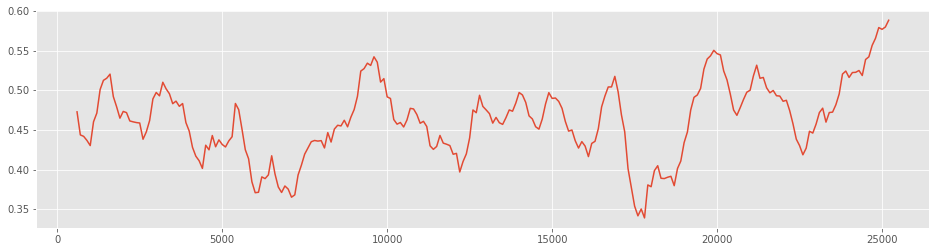

negative


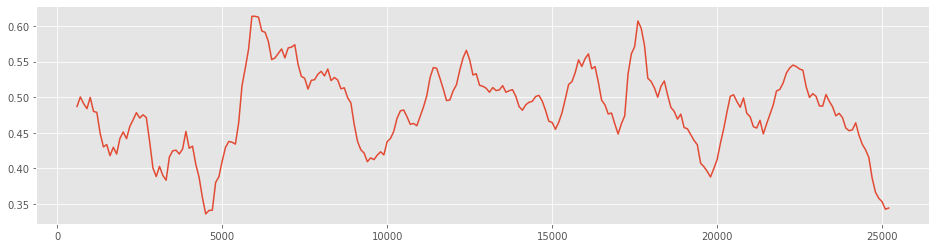

enthusiastic


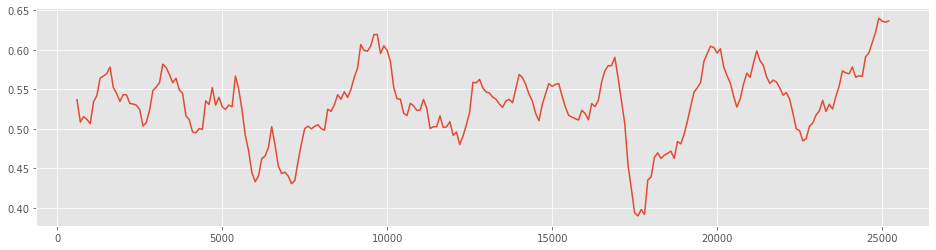

confused


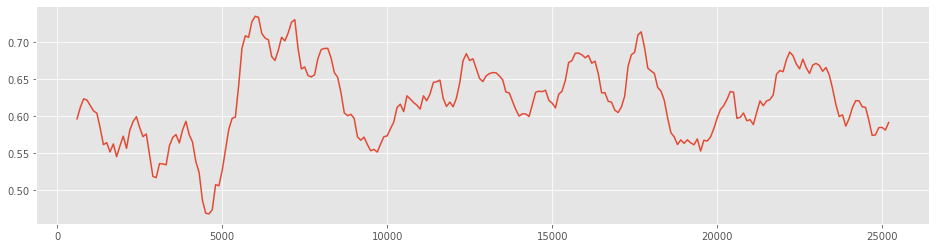

angry


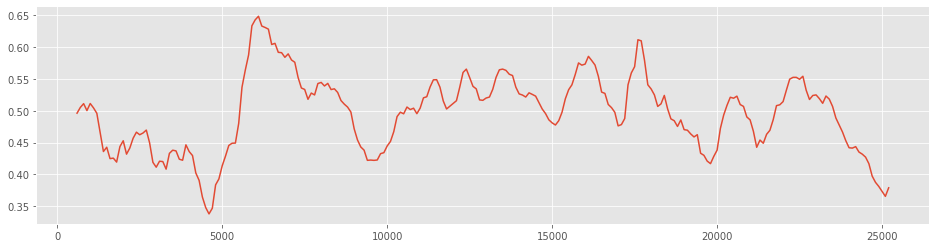

sad


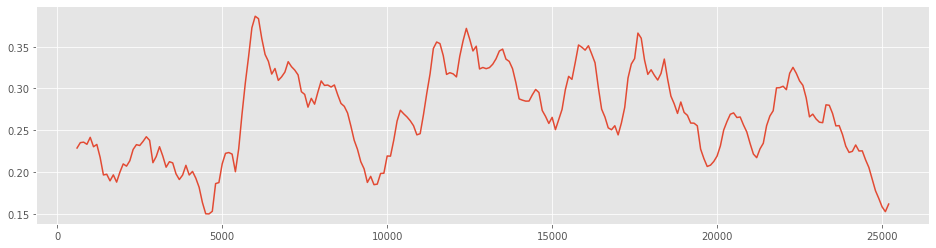

greedy


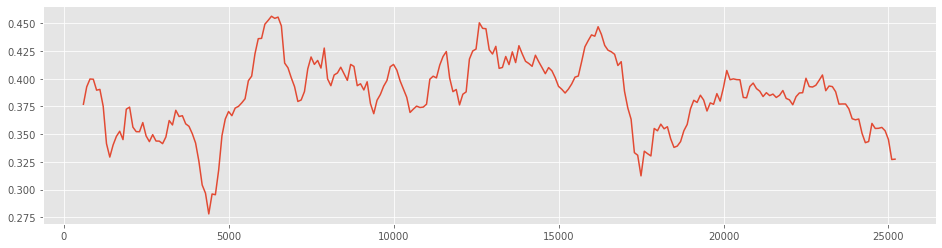

fearful


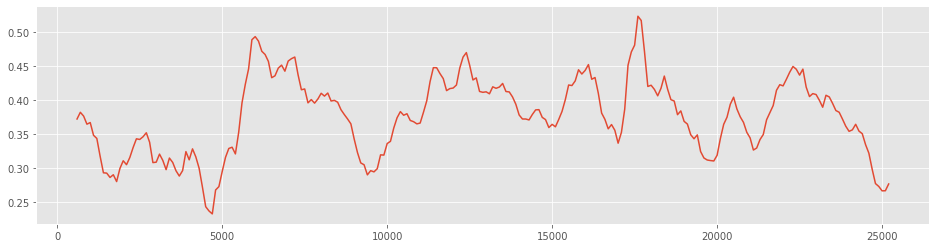

shocked


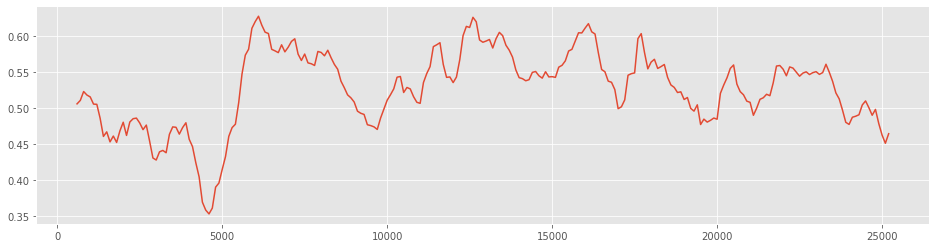

hopeful


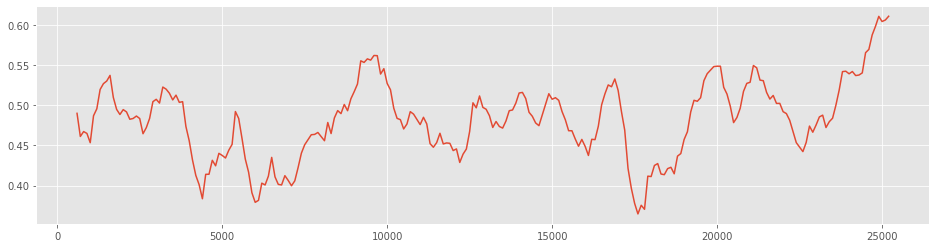

indifferent


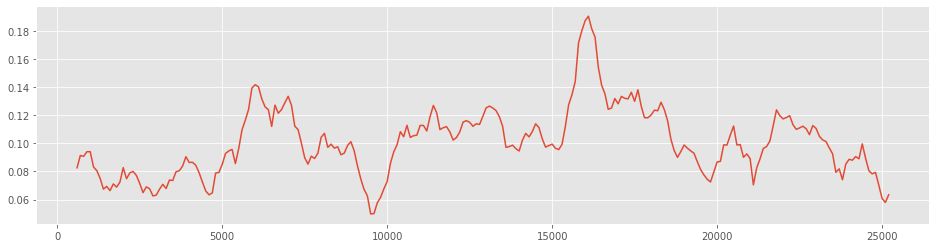

sarcastic


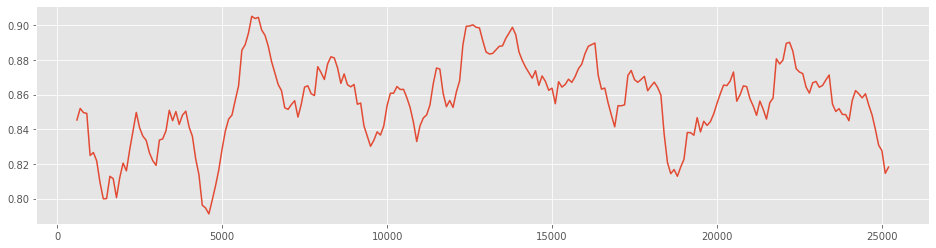

In [13]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (16, 4)

# Gauss-normalise sentiment indices
for sent, index in indices.items():
#     indices[sent] = (index - index.mean()) / index.std()
    print(sent)
    indices[sent].plot()
    plt.show()

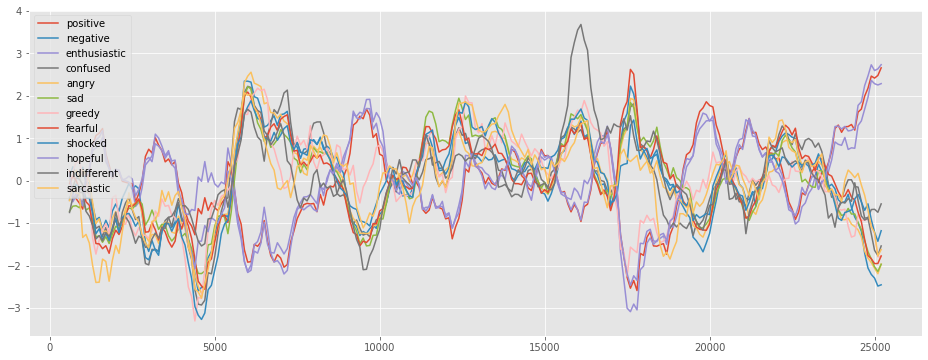

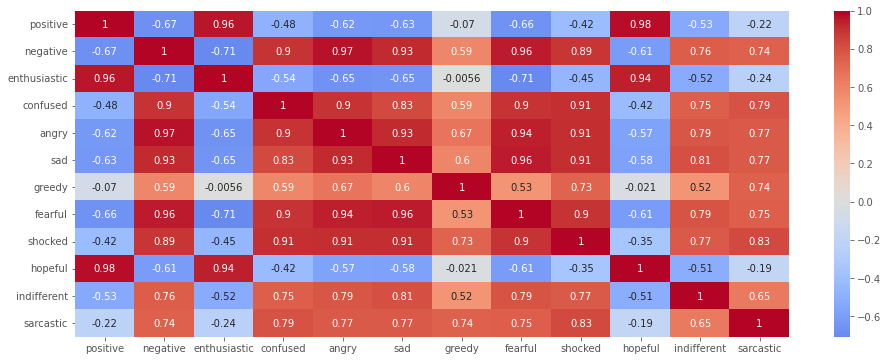

In [9]:
import seaborn as sn

plt.rcParams["figure.figsize"] = (16, 6)

sel = ['positive', 'negative', 'confused', 'sad',
       'greedy', 'indifferent', 'sarcastic']

snts = sentiments

# plot correlation matrix among sentiments
df_index = pd.DataFrame()

for sent, index in indices.items():
    df_index[sent] = index

df_index[snts].plot()
plt.show()
    
cm = df_index[snts].corr()
sn.heatmap(cm, annot=True, cmap='coolwarm', center=0)
plt.show()

In [126]:
from notebooks.hypecommons import download_history_fast

<AxesSubplot:>

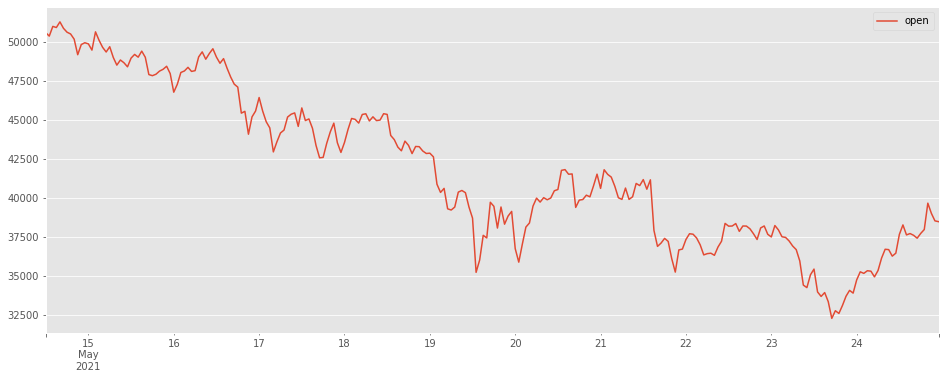

In [127]:
df_btc = download_history_fast('BTCBUSD', '20210514130000', freq=60, days=251/24)

df_btc[['open']].plot() # tweets at 11:59 GMT => open at 12:00 GMT

In [128]:
df_index['BTC/BUSD'] = list(df_btc['open'])
df_index['BTC/BUSD'] = (df_index['BTC/BUSD'] - df_index['BTC/BUSD'].mean()) / df_index['BTC/BUSD'].std()

<AxesSubplot:xlabel='dt'>

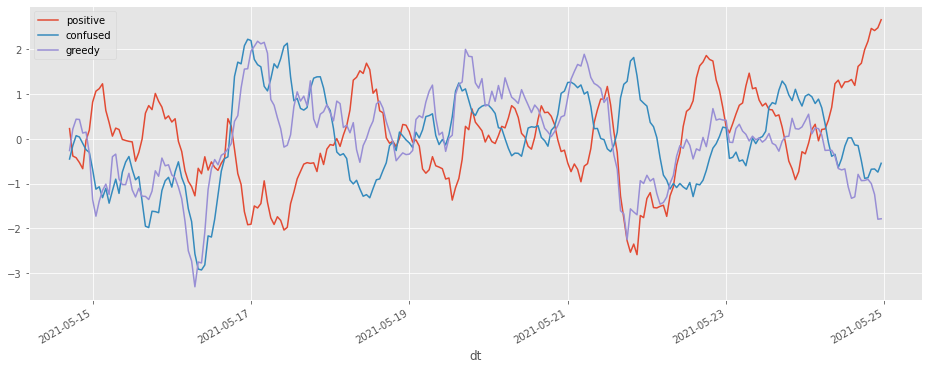

In [137]:
df_index[['positive', 'confused', 'greedy']].plot()

In [130]:
# from scipy import stats

# x = np.arange(0, 1.01, 0.01)
# y = []
# for xi in x:
#     y.append(stats.percentileofscore(df_sub['sa/positive'], xi) / 100)
# plt.plot(x, y)

In [ ]:
# for sent in sentiments:
#     df_sub[f"nsa/{sent}"] = [stats.percentileofscore(df_sub[f"sa/{sent}"], x) / 100 for x in df_sub[f"sa/{sent}"]]

# signal_hist(df_sub, [f"nsa/{sent}" for sent in sentiments], nbins=20)

In [ ]:
# df_sub[['text'] + [f"nsa/{sent}" for sent in sentiments]].sort_values(by='nsa/positive', ascending=False)